In [1]:
%reset

import numpy as np
import pickle as pk
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
import matplotlib
from astropy.io import fits
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

font = {'size'   : 18}
matplotlib.rc('font', **font)
# # Latex stuff
pl.rc('text', usetex=False)
pl.rc('font', family='serif')

# %matplotlib inline




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
ply = fits.open('/global/cfs/cdirs/des/shivamp/actxdes/data_set/planck_data/pl2015/nilc_ymaps.fits')  




In [5]:
ply[1].header


XTENSION= 'BINTABLE'           /Written by IDL:  Sun Feb  1 15:05:26 2015       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                   16 /Number of bytes per row                         
NAXIS2  =             50331648 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                    4 /Number of columns                               
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTVER  =                    1 /Extension version                               
DATE    = '2015-02-01'      

In [6]:
ply_f = ply[1].data['FIRST']
ply_l = ply[1].data['LAST']



In [7]:
ply_diff = ply_f - ply_l



In [24]:
import healpy as hp
nly_pl = hp.anafast(ply_diff, lmax=6000)



In [25]:
l_cl = np.arange(len(nly_pl))





In [26]:
df = np.loadtxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/Planck/planck_yy_noise_full_full_beamed.txt')



In [27]:
import scipy.interpolate as interpolate


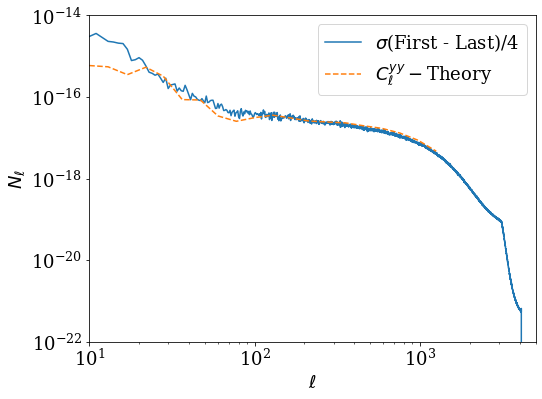

In [35]:
fig, ax = pl.subplots(1,1)
fig.set_size_inches((8,6))  
ax.errorbar(l_cl, nly_pl/4,  label = r'$\sigma$' + '(First - Last)/4', linestyle='-')
df_interp = interpolate.interp1d(np.log(df[:,0]),np.log(df[:,1]),fill_value='extrapolate')  
ax.errorbar(df[:,0], df[:,1],  label = r'$C^{yy}_{\ell} -$' + 'Theory', linestyle='--')
# ax.errorbar(l_cl, np.exp(df_interp(np.log(l_cl))),  label = 'from th', linestyle='-',color='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e1,5e3)
ax.set_ylim(1e-22,1e-14)
ax.set_ylabel(r'$N_{\ell}$')
ax.set_xlabel(r'$\ell$')
ax.legend()




In [36]:
np.savetxt('/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/Planck/planck_yy_noise_first_miuns_last_by_4_beamed.txt',np.array([l_cl[0:5000], nly_pl[0:5000]/4]).T)     


